In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
path = Path('data/train')

In [6]:
path.ls()

[WindowsPath('data/train/collided'),
 WindowsPath('data/train/models'),
 WindowsPath('data/train/moving'),
 WindowsPath('data/train/rest')]

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                          ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes[1]

'moving'

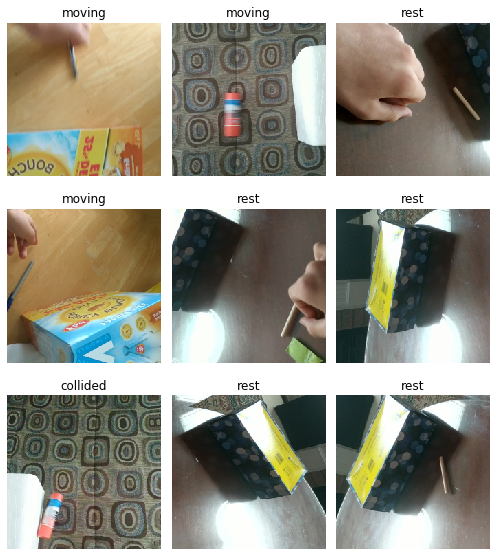

In [12]:
data.show_batch(rows=3, figsize=(7,8))

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['collided', 'moving', 'rest'], 3, 328, 81)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.853007,1.973882,0.654321,00:52
1,1.686513,0.816237,0.345679,00:49
2,1.509420,0.679581,0.259259,00:50
3,1.386002,0.709098,0.283951,00:49


In [24]:
learn.save('stage-1')

In [9]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


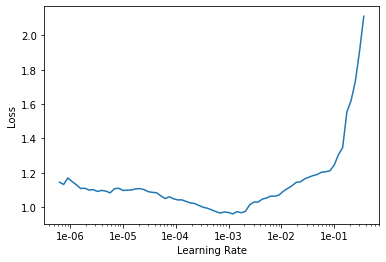

In [28]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

SyntaxError: invalid syntax (<ipython-input-10-dcd98b16cc9a>, line 1)

In [30]:
learn.save('stage-2')

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

(2.5, -0.5)

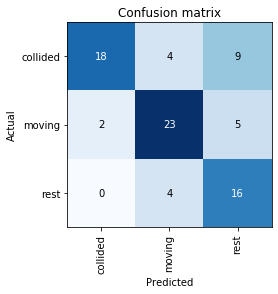

In [40]:
cm_fig = interp.plot_confusion_matrix(return_fig=True)
ax = cm_fig.gca()
ax.set_ylim(interp.data.c - .5, - .5)

In [8]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (328 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
collided,collided,collided,collided,collided
Path: data\train;

Valid: LabelList (81 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
moving,moving,moving,collided,collided
Path: data\train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, af

In [9]:
learn.unfreeze()